In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import contextily as ctx

In [2]:
geometry_data = pd.read_csv('/Users/charlotte/Desktop/Report Development/Notebooks/data/Geometry/practice_locations_longlat.csv')
q_data = pd.read_csv('/Users/charlotte/Desktop/Report Development/Notebooks/data/Geometry/map_q_data_new.csv')
geometry_data.info()
q_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GPPracticeName  916 non-null    object 
 1   PracticeCode    916 non-null    int64  
 2   latitude        916 non-null    float64
 3   longitude       916 non-null    float64
 4   ListSize        916 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 35.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gp_number    894 non-null    int64  
 1   q1_positive  894 non-null    float64
 2   q2_positive  894 non-null    float64
 3   q4_positive  894 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.1 KB


In [3]:
# Merge datasets
geometry_data = pd.merge(
    left=geometry_data,
    right=q_data,
    left_on='PracticeCode',
    right_on='gp_number',
    how='left'
)

geometry_data = geometry_data.drop(columns=['gp_number'])

In [4]:
geometry_data.head()

,GPPracticeName,PracticeCode,latitude,longitude,ListSize,q1_positive,q2_positive,q4_positive
0,Muirhead Medical Centre,10002,56.495719,-3.064575,8102,92.40,93.22,89.72
1,The Blue Practice,10017,56.370539,-3.841282,6620,85.35,89.53,93.89
2,Aberfeldy And Kinloch Rannoch Medical Practice,10036,56.618654,-3.869156,4758,87.11,95.03,98.06
3,Grove Health Centre,10106,56.468776,-2.881552,6075,58.85,85.45,83.48
4,Alyth Health Centre,10125,56.618253,-3.227675,4385,89.13,98.63,97.88


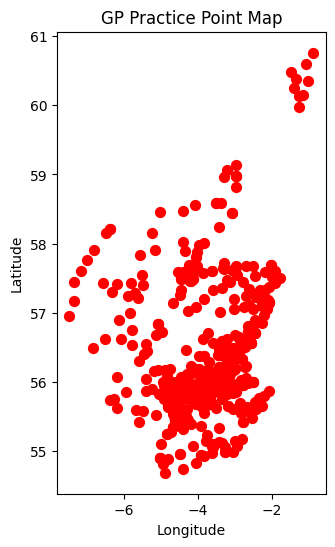

In [5]:
# Assuming you have 'latitude' and 'longitude' columns
geometry_data['geometry'] = geometry_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(geometry_data, geometry='geometry', crs='EPSG:4326')

# Plot the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=50, figsize=(10, 6))

# Add title and labels
plt.title('GP Practice Point Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [6]:
# # Add title and labels
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

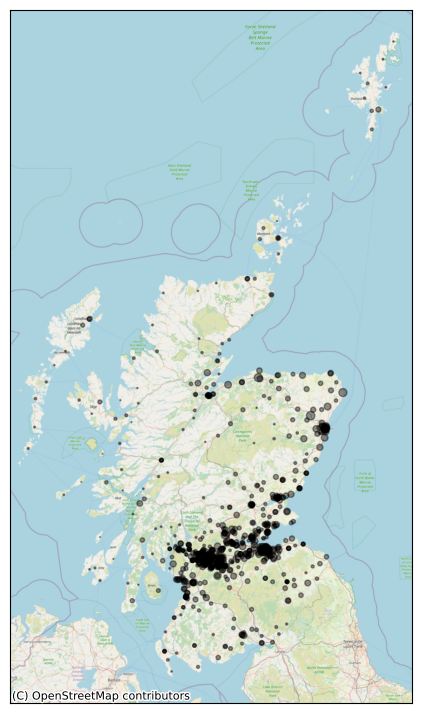

In [7]:
# Assuming you have 'latitude' and 'longitude' columns
geometry_data['geometry'] = geometry_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(geometry_data, geometry='geometry', crs='EPSG:4326')

# Set the same CRS for both GeoDataFrame and basemap
gdf = gdf.to_crs(epsg=3857)

# Plot the GeoDataFrame with point size based on 'ListSize'
fig, ax = plt.subplots(figsize=(15, 9))
gdf.plot(ax=ax, marker='o', color='black', alpha=0.4, markersize=1.5 * geometry_data['ListSize'] / 1000)

# Add OpenStreetMap as a background basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8, alpha=1)  # 0.7 for light

# Set the aspect ratio explicitly for both the GeoDataFrame plot and basemap
ax.set_aspect('equal', adjustable='box')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Save the plot as a PNG image
plt.savefig('output_plot_opaque.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

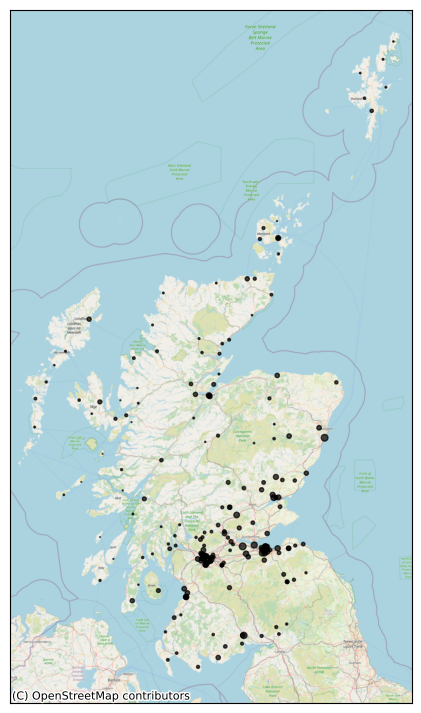

In [8]:
# Assuming you have 'latitude' and 'longitude' columns
geometry_data['geometry'] = geometry_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(geometry_data, geometry='geometry', crs='EPSG:4326')

# Set the same CRS for both GeoDataFrame and basemap
gdf = gdf.to_crs(epsg=3857)

# Filter DataFrame to include only top 25% in the q1_positive column
top_25_percent = geometry_data[geometry_data['q1_positive'] >= geometry_data['q1_positive'].quantile(0.75)]

# Create a GeoDataFrame for the top 25%
gdf_top_25_percent = gpd.GeoDataFrame(top_25_percent, geometry='geometry', crs='EPSG:4326').to_crs(epsg=3857)

# Plot the GeoDataFrame with point size based on 'ListSize'
fig, ax = plt.subplots(figsize=(15, 9))

# Plot the bottom 75% with alpha=0
gdf.plot(ax=ax, marker='o', color='black', alpha=0, markersize=1.5 * geometry_data['ListSize'] / 1000)

# Plot the top 25% in a different color with alpha=0.7
gdf_top_25_percent.plot(ax=ax, marker='o', color='black', alpha=0.7, markersize=1.5 * top_25_percent['ListSize'] / 1000)

# Add OpenStreetMap as a background basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8, alpha=1)  # 0.7 for light

# Set the aspect ratio explicitly for both the GeoDataFrame plot and basemap
ax.set_aspect('equal', adjustable='box')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Save the plot as a PNG image
plt.savefig('output_plot_top_25_q1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

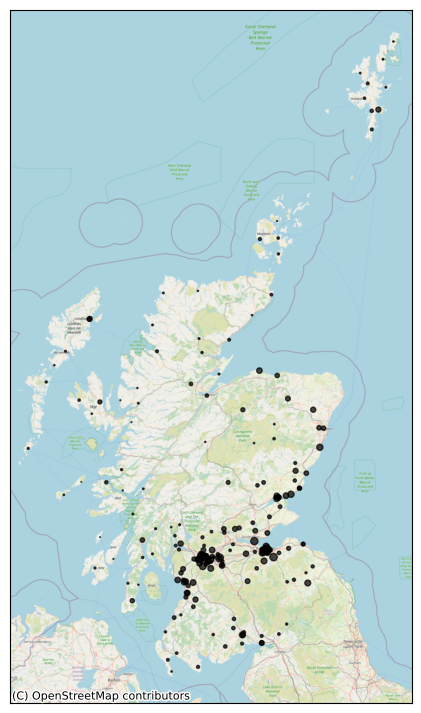

In [9]:
# Assuming you have 'latitude' and 'longitude' columns
geometry_data['geometry'] = geometry_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(geometry_data, geometry='geometry', crs='EPSG:4326')

# Set the same CRS for both GeoDataFrame and basemap
gdf = gdf.to_crs(epsg=3857)

# Filter DataFrame to include only top 25% in the q2_positive column
top_25_percent = geometry_data[geometry_data['q2_positive'] >= geometry_data['q2_positive'].quantile(0.75)]

# Create a GeoDataFrame for the top 25%
gdf_top_25_percent = gpd.GeoDataFrame(top_25_percent, geometry='geometry', crs='EPSG:4326').to_crs(epsg=3857)

# Plot the GeoDataFrame with point size based on 'ListSize'
fig, ax = plt.subplots(figsize=(15, 9))

# Plot the bottom 75% with alpha=0
gdf.plot(ax=ax, marker='o', color='black', alpha=0, markersize=1.5 * geometry_data['ListSize'] / 1000)

# Plot the top 25% in a different color with alpha=0.7
gdf_top_25_percent.plot(ax=ax, marker='o', color='black', alpha=0.7, markersize=1.5 * top_25_percent['ListSize'] / 1000)

# Add OpenStreetMap as a background basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8, alpha=1)  # 0.7 for light

# Set the aspect ratio explicitly for both the GeoDataFrame plot and basemap
ax.set_aspect('equal', adjustable='box')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Save the plot as a PNG image
plt.savefig('output_plot_top_25_q2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

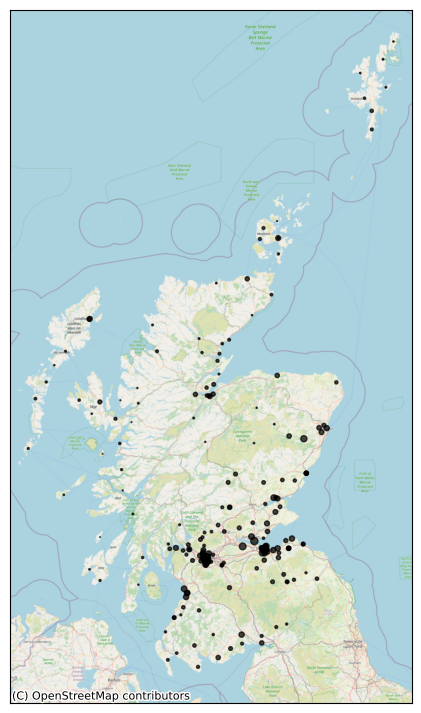

In [10]:
# Assuming you have 'latitude' and 'longitude' columns
geometry_data['geometry'] = geometry_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(geometry_data, geometry='geometry', crs='EPSG:4326')

# Set the same CRS for both GeoDataFrame and basemap
gdf = gdf.to_crs(epsg=3857)

# Filter DataFrame to include only top 25% in the 4_positive column
top_25_percent = geometry_data[geometry_data['q4_positive'] >= geometry_data['q4_positive'].quantile(0.75)]

# Create a GeoDataFrame for the top 25%
gdf_top_25_percent = gpd.GeoDataFrame(top_25_percent, geometry='geometry', crs='EPSG:4326').to_crs(epsg=3857)

# Plot the GeoDataFrame with point size based on 'ListSize'
fig, ax = plt.subplots(figsize=(15, 9))

# Plot the bottom 75% with alpha=0
gdf.plot(ax=ax, marker='o', color='black', alpha=0, markersize=1.5 * geometry_data['ListSize'] / 1000)

# Plot the top 25% in a different color with alpha=0.7
gdf_top_25_percent.plot(ax=ax, marker='o', color='black', alpha=0.7, markersize=1.5 * top_25_percent['ListSize'] / 1000)

# Add OpenStreetMap as a background basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8, alpha=1)  # 0.7 for light

# Set the aspect ratio explicitly for both the GeoDataFrame plot and basemap
ax.set_aspect('equal', adjustable='box')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Save the plot as a PNG image
plt.savefig('output_plot_top_25_q4.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()